In [1]:
import pandas as pd 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amshahhh/infosec-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/infosec-dataset


In [3]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("sid321axn/malicious-urls-dataset")
main = pd.read_csv("/kaggle/input/malicious-urls-dataset/malicious_phish.csv")
main

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [4]:
import pandas as pd

# Define a list of file paths and corresponding types
file_paths = [
    ("/kaggle/input/infosec-dataset/FinalDataset/URL/Benign_list_big_final.csv", "benign"),
    ("/kaggle/input/infosec-dataset/FinalDataset/URL/DefacementSitesURLFiltered.csv", "defacement"),
    ("/kaggle/input/infosec-dataset/FinalDataset/URL/Malware_dataset.csv", "malware"),
    ("/kaggle/input/infosec-dataset/FinalDataset/URL/phishing_dataset.csv", "phishing"),
    ("/kaggle/input/infosec-dataset/FinalDataset/URL/spam_dataset.csv", "spam")
]

# Initialize an empty list to store dataframes
dfs = []

# Iterate through the file paths and types
for file_path, url_type in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path, header=None)
    # Assign column names
    df.columns = ["url"]
    # Add a column for the URL type
    df["type"] = url_type
    # Append the dataframe to the list
    dfs.append(df)

dfs.append(main)
# Concatenate the list of dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# Display the merged dataframe
merged_df.head(100000)

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
99995,http://www.ccent.com.au/index.php?view=article...,defacement
99996,http://www.ccent.com.au/index.php?option=com_c...,defacement
99997,http://www.ccent.com.au/index.php?option=com_m...,defacement
99998,http://www.ccent.com.au/index.php?view=article...,defacement


In [5]:
combined_df = merged_df

# DATA PREPROSSESING

In [6]:
print("Missing values before cleaning:")
print(combined_df.isnull().sum())

# Drop rows with missing values
combined_df = combined_df.dropna()

# Verify after cleaning
print("Missing values after cleaning:")
print(combined_df.isnull().sum())

Missing values before cleaning:
url     0
type    0
dtype: int64
Missing values after cleaning:
url     0
type    0
dtype: int64


In [7]:
# Remove duplicate URLs
print(f"Shape before removing duplicates: {combined_df.shape}")
combined_df = combined_df.drop_duplicates(subset=['url'])
print(f"Shape after removing duplicates: {combined_df.shape}")

Shape before removing duplicates: (653046, 2)
Shape after removing duplicates: (653040, 2)


In [8]:
df = combined_df

In [9]:
import re
import pandas as pd
from urllib.parse import urlparse

def extract_url_features(url):
    try:
        # Handle NaN/None cases
        if pd.isna(url):
            return None
            
        parsed = urlparse(url)
        if not parsed.netloc and not parsed.path:  # Invalid URL
            return None
            
        features = {
            'url_length': len(url),
            'num_dots': url.count('.'),
            'num_hyphens': url.count('-'),
            'num_underscore': url.count('_'),
            'num_slash': url.count('/'),
            'num_questionmark': url.count('?'),
            'num_equal': url.count('='),
            'num_at': url.count('@'),
            'num_and': url.count('&'),
            'num_exclamation': url.count('!'),
            'num_space': url.count(' '),
            'num_tilde': url.count('~'),
            'num_comma': url.count(','),
            'num_plus': url.count('+'),
            'num_asterisk': url.count('*'),
            'num_hash': url.count('#'),
            'num_dollar': url.count('$'),
            'num_percent': url.count('%'),
            'domain_length': len(parsed.netloc),
            'num_subdomains': parsed.netloc.count('.') if parsed.netloc else 0,
            'has_ip': 1 if re.match(r'\d+\.\d+\.\d+\.\d+', parsed.netloc) else 0,
            'path_length': len(parsed.path),
            'query_length': len(parsed.query),
            'has_https': 1 if parsed.scheme == 'https' else 0,
            'short_url': 1 if len(url) < 30 else 0
        }
        
        return features
    except:
        return None

# Assuming your DataFrame is called 'df' (not combined_df)
url_features = df['url'].apply(extract_url_features)
url_features_df = pd.DataFrame(list(url_features))

# Combine with original data
processed_df = pd.concat([df.reset_index(drop=True), url_features_df], axis=1)

# Drop rows where feature extraction failed
processed_df = processed_df.dropna(subset=url_features_df.columns)

In [10]:
processed_df

,url,type,url_length,num_dots,num_hyphens,num_underscore,num_slash,num_questionmark,num_equal,num_at,...,num_hash,num_dollar,num_percent,domain_length,num_subdomains,has_ip,path_length,query_length,has_https,short_url
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,83,1,8,0,6,0,0,0,...,0,0,0,8,1,0,68,0,0,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,83,1,9,0,6,0,0,0,...,0,0,0,8,1,0,68,0,0,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,83,1,9,0,6,0,0,0,...,0,0,0,8,1,0,68,0,0,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,83,1,11,0,6,0,0,0,...,0,0,0,8,1,0,68,0,0,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,83,1,9,0,6,0,0,0,...,0,0,0,8,1,0,68,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653035,xbox360.ign.com/objects/850/850402.html,phishing,39,3,0,0,3,0,0,0,...,0,0,0,0,0,0,39,0,0,0
653036,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,2,2,0,4,0,0,0,...,0,0,0,0,0,0,44,0,0,0
653037,www.gamespot.com/xbox360/action/deadspace/,phishing,42,2,0,0,4,0,0,0,...,0,0,0,0,0,0,42,0,0,0
653038,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,2,0,3,2,0,0,0,...,0,0,0,0,0,0,45,0,0,0


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
processed_df['type_encoded'] = label_encoder.fit_transform(processed_df['type'])

# Check encoding mapping
print("Class encoding mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {i}")

Class encoding mapping:
benign: 0
defacement: 1
malware: 2
phishing: 3
spam: 4


In [12]:
processed_df['type_encoded']

0         0
1         0
2         0
3         0
4         0
         ..
653035    3
653036    3
653037    3
653038    3
653039    3
Name: type_encoded, Length: 653040, dtype: int64

# DATA BALANCING

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = processed_df.drop(['url', 'type', 'type_encoded'], axis=1)
y = processed_df['type_encoded']

# Split data before balancing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Balanced class distribution:")
print(pd.Series(y_train_balanced).value_counts())

Balanced class distribution:
type_encoded
3    342323
2    342323
0    342323
1    342323
4    342323
Name: count, dtype: int64


# EDA

In [14]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost tensorflow transformers nltk imbalanced-learn

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

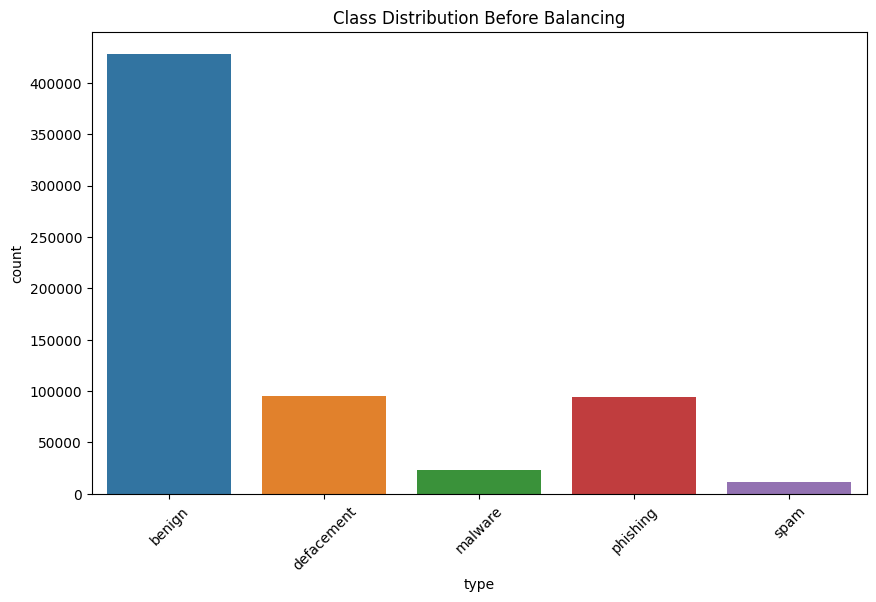

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=processed_df)
plt.title('Class Distribution Before Balancing')
plt.xticks(rotation=45)
plt.show()

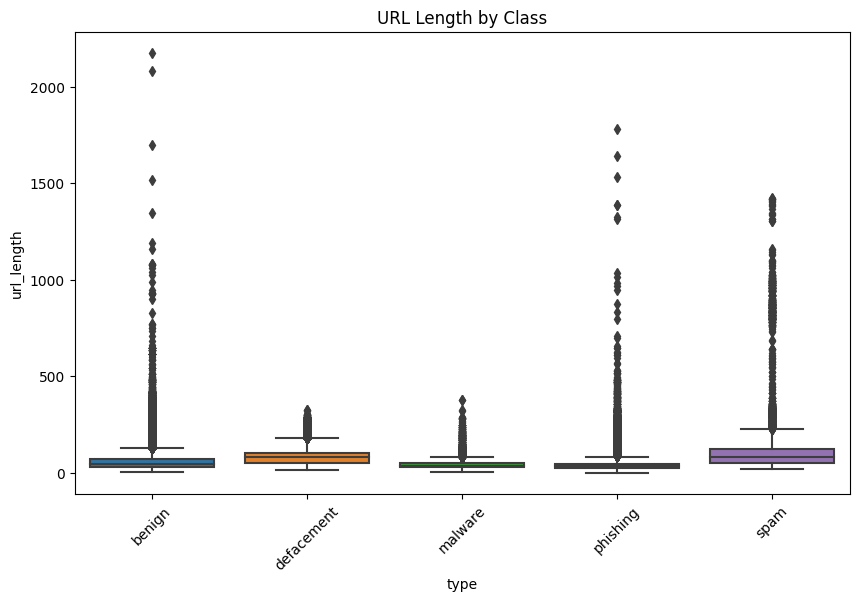

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='url_length', data=processed_df)
plt.title('URL Length by Class')
plt.xticks(rotation=45)
plt.show()

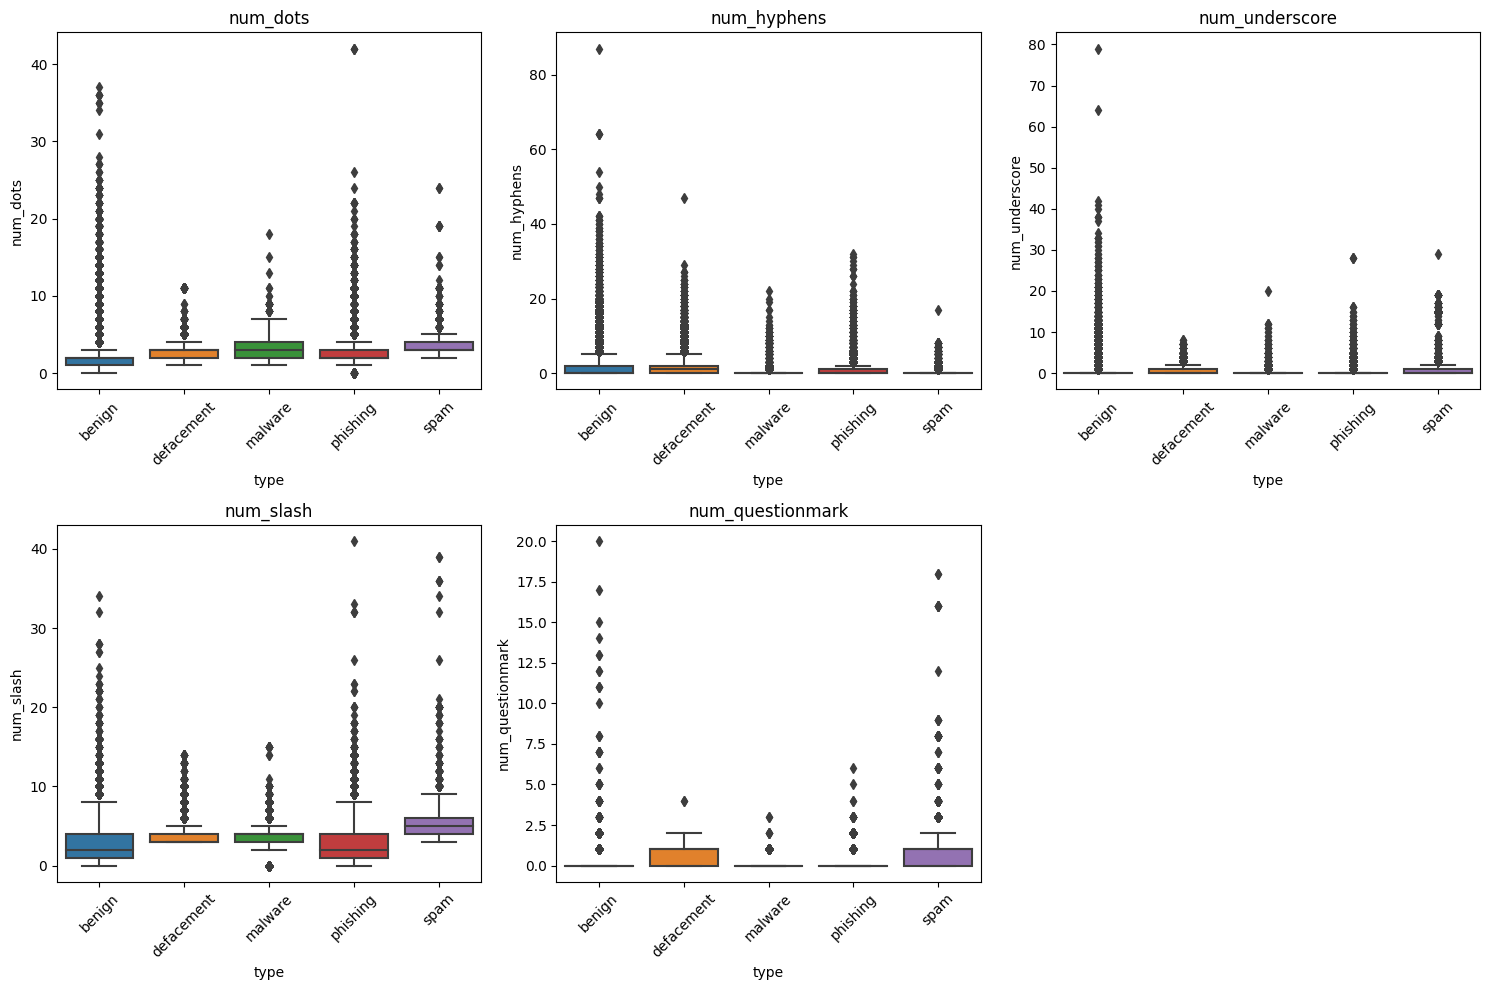

In [17]:
special_chars = ['num_dots', 'num_hyphens', 'num_underscore', 'num_slash', 'num_questionmark']

plt.figure(figsize=(15, 10))
for i, char in enumerate(special_chars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='type', y=char, data=processed_df)
    plt.title(char)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

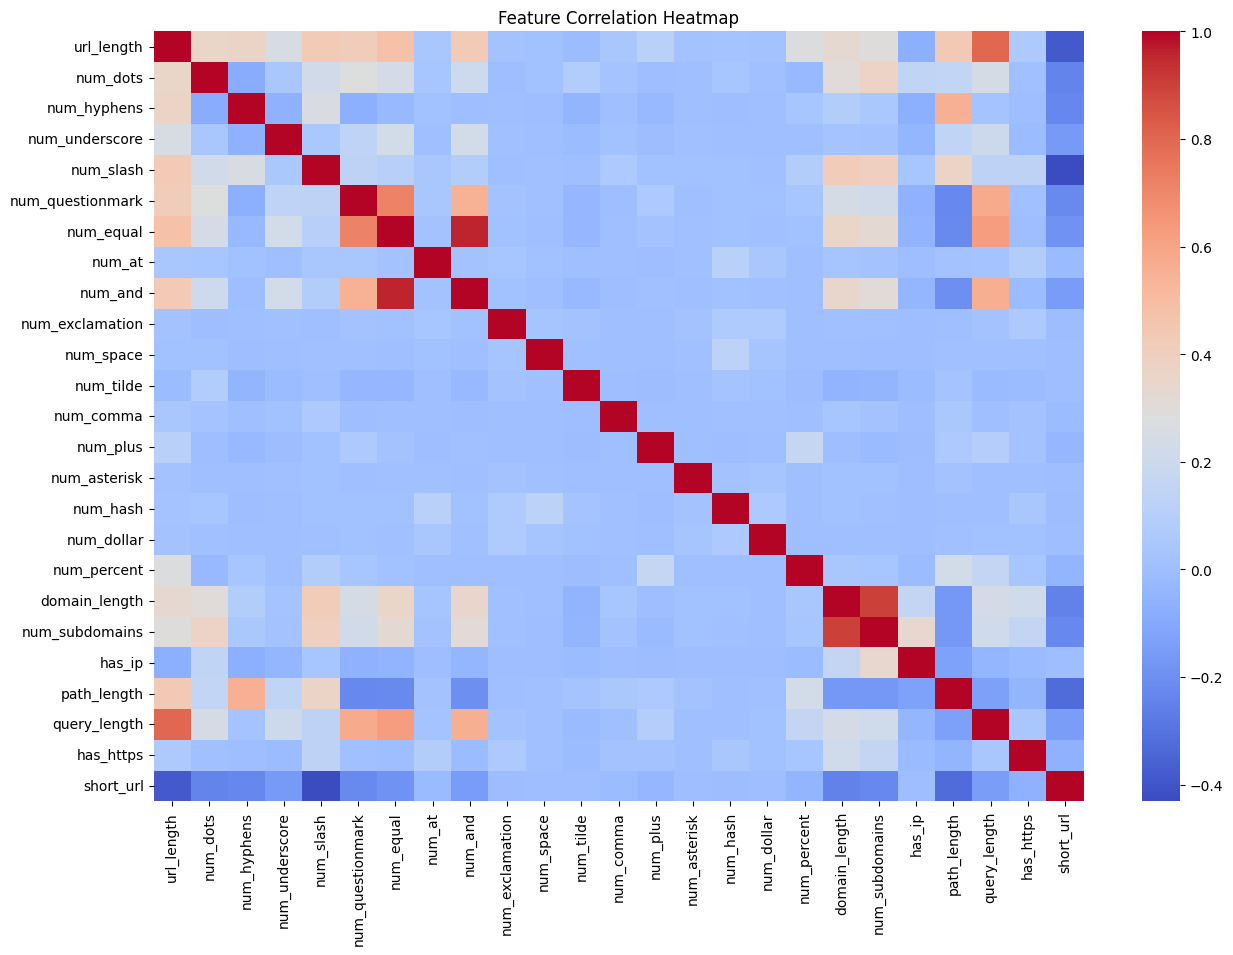

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

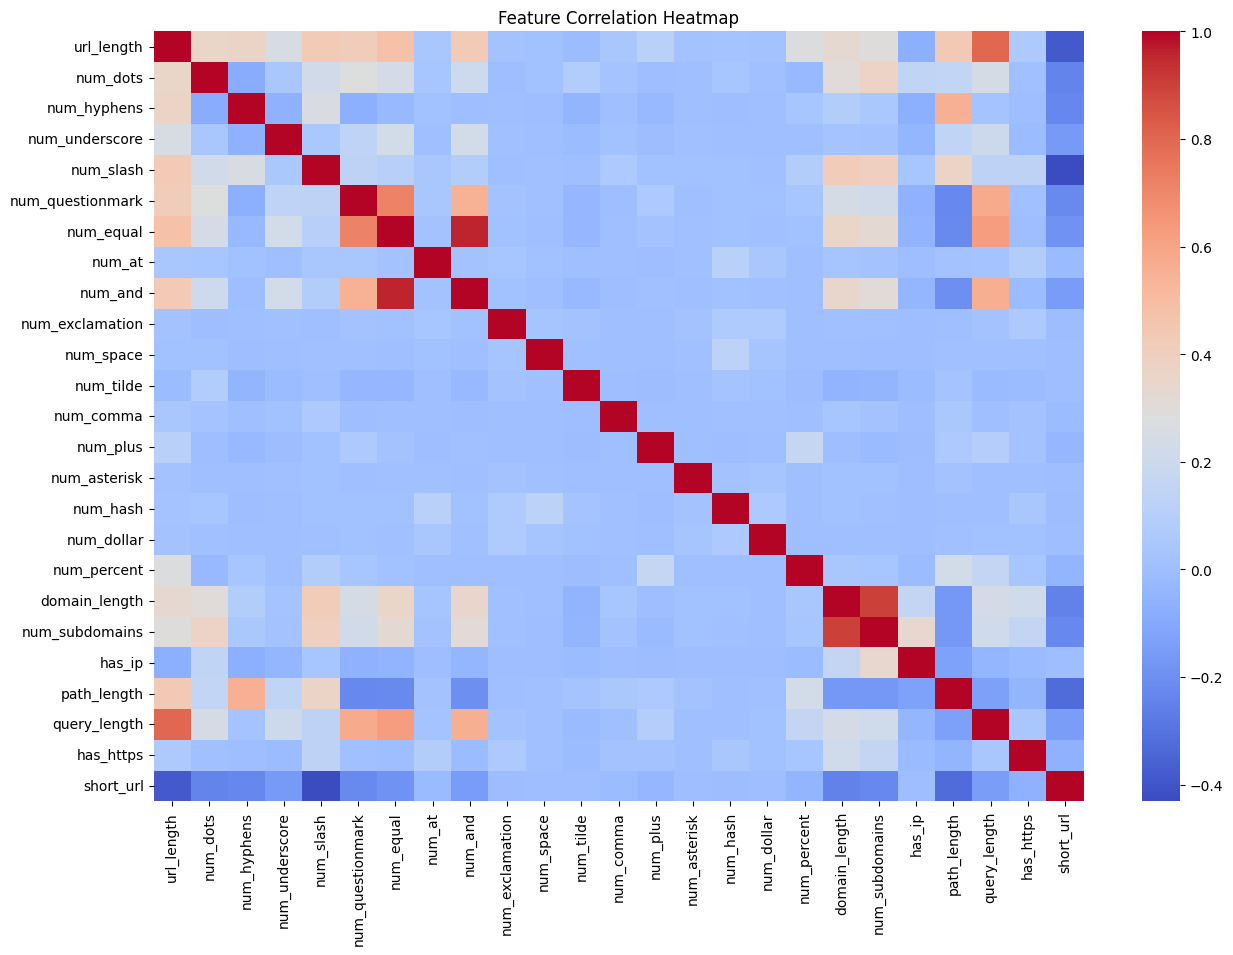

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# FEATURE EXTRACTION

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract tokens from URLs
def tokenize_url(url):
    tokens = re.split(r'[\/\?\.\=\-\_\&\@\#\%]', url)
    return [token for token in tokens if token != '']

# Create TF-IDF features
tfidf = TfidfVectorizer(tokenizer=tokenize_url, max_features=100)
tfidf_features = tfidf.fit_transform(processed_df['url'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=[f"tfidf_{i}" for i in range(tfidf_features.shape[1])])

# Combine with structural features
final_features = pd.concat([X.reset_index(drop=True), tfidf_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [27]:
processed_df = final_features 

In [14]:
processed_df

,url,type,url_length,num_dots,num_hyphens,num_underscore,num_slash,num_questionmark,num_equal,num_at,...,num_dollar,num_percent,domain_length,num_subdomains,has_ip,path_length,query_length,has_https,short_url,type_encoded
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,83,1,8,0,6,0,0,0,...,0,0,8,1,0,68,0,0,0,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,83,1,9,0,6,0,0,0,...,0,0,8,1,0,68,0,0,0,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,83,1,9,0,6,0,0,0,...,0,0,8,1,0,68,0,0,0,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,83,1,11,0,6,0,0,0,...,0,0,8,1,0,68,0,0,0,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,83,1,9,0,6,0,0,0,...,0,0,8,1,0,68,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653035,xbox360.ign.com/objects/850/850402.html,phishing,39,3,0,0,3,0,0,0,...,0,0,0,0,0,39,0,0,0,3
653036,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,2,2,0,4,0,0,0,...,0,0,0,0,0,44,0,0,0,3
653037,www.gamespot.com/xbox360/action/deadspace/,phishing,42,2,0,0,4,0,0,0,...,0,0,0,0,0,42,0,0,0,3
653038,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,2,0,3,2,0,0,0,...,0,0,0,0,0,45,0,0,0,3


# ML MODEL

Original class distribution: [342464  76246  18916  75269   9537]
Resampled class distribution: [342464 342464 342464 342464 342464]

Training Random Forest model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.



Model Evaluation:


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.8s finished



Classification Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     85616
  defacement       1.00      1.00      1.00     19062
     malware       1.00      1.00      1.00      4729
    phishing       1.00      1.00      1.00     18817
        spam       1.00      1.00      1.00      2384

    accuracy                           1.00    130608
   macro avg       1.00      1.00      1.00    130608
weighted avg       1.00      1.00      1.00    130608



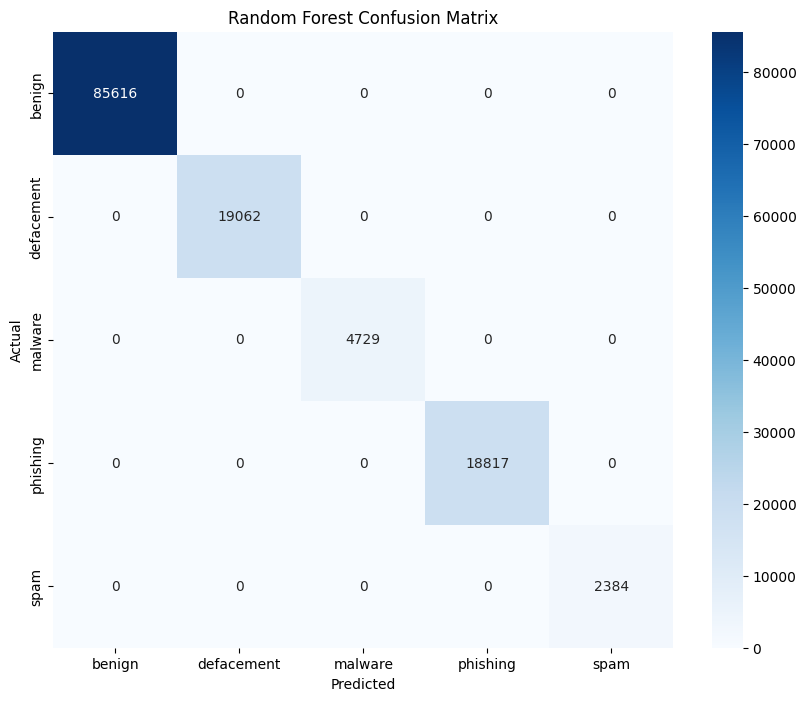

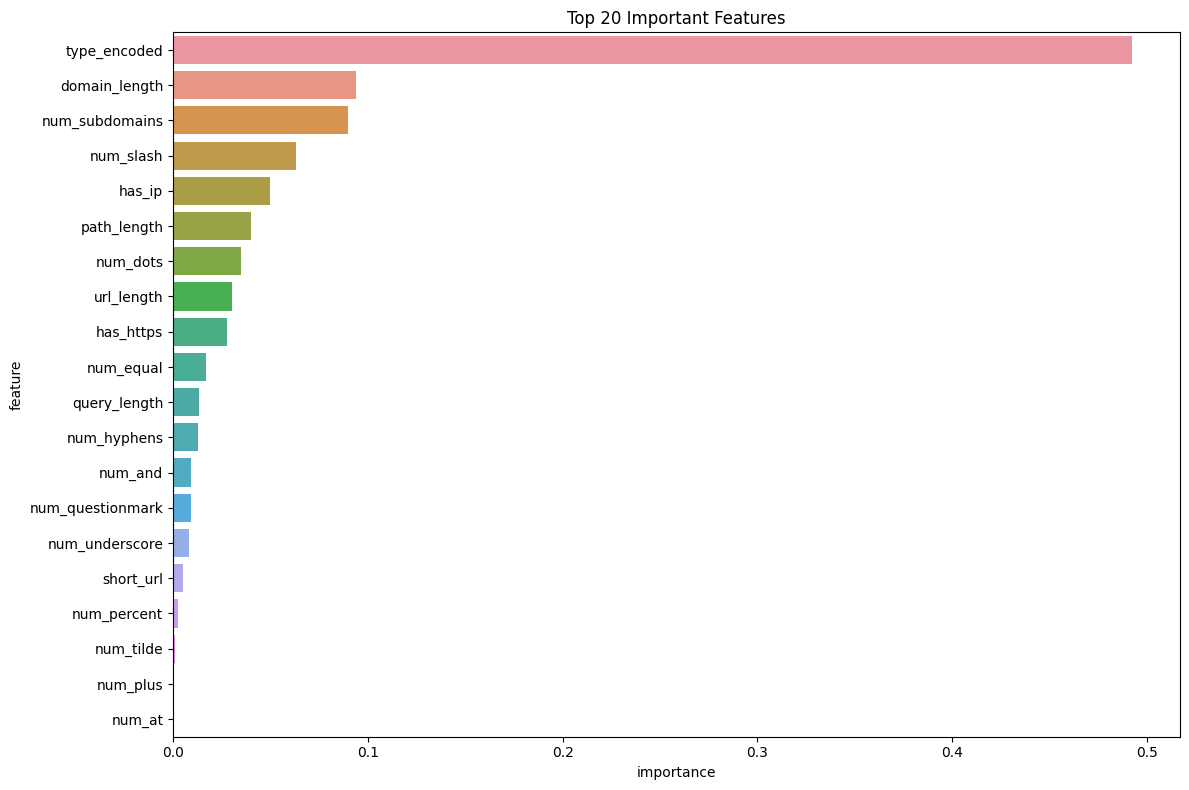

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# 1. Prepare the data - use only numerical features
# Select only the numerical columns (excluding any text/URL columns)
numerical_cols = processed_df.select_dtypes(include=['int64', 'float64']).columns
X = processed_df[numerical_cols]
y = processed_df['type_encoded']

# 2. Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Handle class imbalance with RandomOverSampler (works directly on numerical data)
print("Original class distribution:", np.bincount(y_train))
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
print("Resampled class distribution:", np.bincount(y_train_res))

# 4. Initialize and train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=150,          # Number of trees
    max_depth=12,              # Maximum tree depth
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples at a leaf node
    max_features='sqrt',       # Number of features to consider at each split
    class_weight='balanced',   # Adjust weights for imbalanced classes
    random_state=42,
    n_jobs=-1,                # Use all available cores
    verbose=1                 # Show training progress
)

print("\nTraining Random Forest model...")
rf_model.fit(X_train_res, y_train_res)

# 5. Model evaluation
print("\nModel Evaluation:")
y_pred = rf_model.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.show()

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.999961717505819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85616
           1       1.00      1.00      1.00     19062
           2       1.00      1.00      1.00      4729
           3       1.00      1.00      1.00     18817
           4       1.00      1.00      1.00      2384

    accuracy                           1.00    130608
   macro avg       1.00      1.00      1.00    130608
weighted avg       1.00      1.00      1.00    130608



# LLM

In [44]:
pip install transformers torch


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# 1. Prepare the data - use only numerical features
# Select only the numerical columns (excluding any text/URL columns)
numerical_cols = processed_df.select_dtypes(include=['int64', 'float64']).columns
X = processed_df[numerical_cols]
y = processed_df['type_encoded']

# 2. Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForSequenceClassification.from_pretrained("distilgpt2", num_labels=len(set(processed_df['type_encoded'])))

# Tokenization
class URLDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        encoding = self.tokenizer(self.texts[idx], truncation=True, padding='max_length', max_length=128, return_tensors="pt")
        return {"input_ids": encoding["input_ids"].squeeze(), "attention_mask": encoding["attention_mask"].squeeze(), "labels": torch.tensor(self.labels[idx])}

train_dataset = URLDataset(X_train, X_test, tokenizer)
test_dataset = URLDataset(y_train, y_test, tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate
eval_results = trainer.evaluate()
print(eval_results)


In [ ]:
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Load tokenizer and model (using DistilBERT)
MODEL_NAME = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)

# Function to extract embeddings
def get_embeddings(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=200)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # Extract [CLS] token representation

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(processed_df['type_encoded'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(processed_df['url'], y_encoded, test_size=0.2, random_state=42)

# Convert URLs to embeddings
X_train_embeddings = get_embeddings(X_train.tolist())
X_test_embeddings = get_embeddings(X_test.tolist())

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_embeddings, y_train)

# Train a simple classifier on embeddings
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred = classifier.predict(X_test_embeddings)
print("\nTransformer-based Model Performance:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


# LSTM

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize URLs
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(processed_df['url'])
sequences = tokenizer.texts_to_sequences(processed_df['url'])
padded_sequences = pad_sequences(sequences, maxlen=200)

# Split data for LSTM
X_lstm_train, X_lstm_test, y_lstm_train, y_lstm_test = train_test_split(
    padded_sequences, y, test_size=0.2, random_state=42)

# Apply SMOTE (requires reshaping)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_lstm_train_flat = X_lstm_train.reshape(X_lstm_train.shape[0], -1)
X_lstm_train_balanced_flat, y_lstm_train_balanced = smote.fit_resample(X_lstm_train_flat, y_lstm_train)
X_lstm_train_balanced = X_lstm_train_balanced_flat.reshape(-1, X_lstm_train.shape[1])

# Build LSTM model
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=200),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
history = lstm_model.fit(X_lstm_train_balanced, y_lstm_train_balanced, 
                        epochs=5, batch_size=64, 
                        validation_data=(X_lstm_test, y_lstm_test))

# Evaluate
y_lstm_pred = np.argmax(lstm_model.predict(X_lstm_test), axis=1)
print("\nLSTM Performance:")
print(classification_report(y_lstm_test, y_lstm_pred, target_names=label_encoder.classes_))

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
26744/26744 ━━━━━━━━━━━━━━━━━━━━ 379s 14ms/step - accuracy: 0.8488 - loss: 0.4233 - val_accuracy: 0.9627 - val_loss: 0.1196
Epoch 2/5
26744/26744 ━━━━━━━━━━━━━━━━━━━━ 375s 14ms/step - accuracy: 0.9596 - loss: 0.1171 - val_accuracy: 0.9737 - val_loss: 0.0854
Epoch 3/5
26744/26744 ━━━━━━━━━━━━━━━━━━━━ 377s 14ms/step - accuracy: 0.9676 - loss: 0.0937 - val_accuracy: 0.9756 - val_loss: 0.0804
Epoch 4/5
26744/26744 ━━━━━━━━━━━━━━━━━━━━ 376s 14ms/step - accuracy: 0.9710 - loss: 0.0831 - val_accuracy: 0.9723 - val_loss: 0.0901
Epoch 5/5
26744/26744 ━━━━━━━━━━━━━━━━━━━━ 376s 14ms/step - accuracy: 0.9728 - loss: 0.0777 - val_accuracy: 0.9777 - val_loss: 0.0733
4082/4082 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step

LSTM Performance:


NameError: name 'classification_report' is not defined

In [23]:
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



LSTM Performance:
              precision    recall  f1-score   support

      benign       0.98      0.99      0.99     85757
  defacement       0.99      1.00      0.99     18929
     malware       0.99      0.94      0.96      4672
    phishing       0.94      0.91      0.92     18924
        spam       1.00      1.00      1.00      2326

    accuracy                           0.98    130608
   macro avg       0.98      0.97      0.97    130608
weighted avg       0.98      0.98      0.98    130608



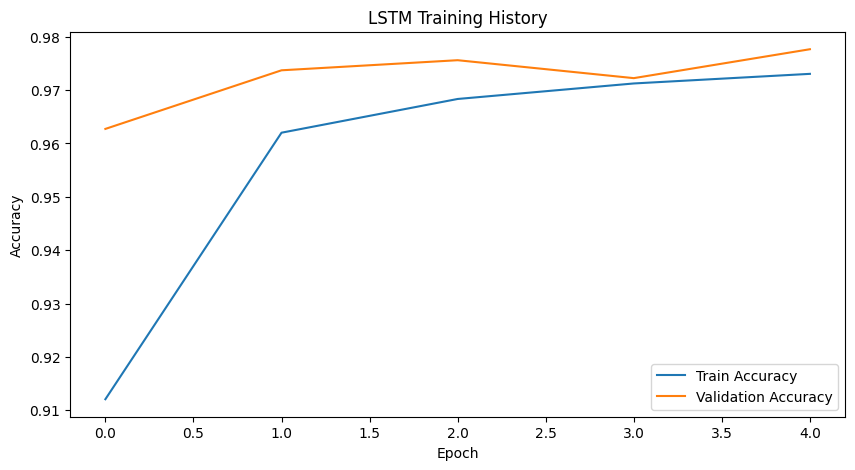

In [24]:
print("\nLSTM Performance:")
print(classification_report(y_lstm_test, y_lstm_pred, target_names=label_encoder.classes_))

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# RESULTS VISUALIZATION

In [ ]:
# Add deep learning results to our comparison
results['LSTM'] = accuracy_score(y_lstm_test, y_lstm_pred)
results['BERT'] = accuracy_score(y_bert_test, y_bert_pred)

# Plot model comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.axhline(y=0.9, color='r', linestyle='--', label='Target Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))

# Plot ROC for Random Forest (example for one model)
rf_probs = models['Random Forest'].predict_proba(X_test)

plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()